# FloPy 

### `SpatialReference` demo

A short demonstration of functionality in the `SpatialReference` class for locating the model in a "real world" coordinate reference system

In [1]:
import sys
import os
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    import flopy
    
from flopy.utils.reference import SpatialReference
import flopy.utils.binaryfile as bf

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

flopy is installed in /Users/jdhughes/Documents/Development/flopy_git/flopy_fork/flopy
3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 14:38:56) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version: 1.17.3
matplotlib version: 3.1.1
flopy version: 3.2.13


In [2]:
outpath = 'data'
if os.path.isdir(outpath):
    shutil.rmtree(outpath)
os.mkdir(outpath)

### Description

`SpatialReference` is a stand-alone option that describes the location of the model grid in a real-world coordinate reference system. It can be created with some basic information about the model's location.

In [3]:
nrow, ncol = 10, 10
xll, yll = 617822.3, 5114820.7 # origin of the model (lower left corner)
dxdy = 250 # grid spacing (in model units)
rot = 29 # rotation (positive counterclockwise)

# epsg code specifying coordinate reference system
# (https://www.epsg-registry.org/)
# in this case, UTM zone 16 N, NAD83
# https://spatialreference.org/ref/epsg/nad83-utm-zone-16n/
model_epsg = 26915

# alternatively, a proj4 string can be supplied
model_proj4 = 'https://spatialreference.org/ref/epsg/nad83-utm-zone-16n/proj4/'

# row and column spacings
# (note that delc is column spacings along a row; delr the row spacings along a column)
delc = np.ones(nrow, dtype=float) * dxdy
delr = np.ones(ncol, dtype=float) * dxdy

sr = SpatialReference(delr=delr, delc=delc, xll=xll, yll=yll, rotation=rot, epsg=model_epsg)

#### `SpatialReference` makes many calculations internally, so you don't have to

calling the sr object prints the important parameters. Note that the upper right corner of the model, which is often used to specify the origin, has been calculated. A proj4 string has also been fetched from <spatialreference.org> using the supplied epsg code.

In [4]:
sr

xul:616610.2759; yul:5117007.249; rotation:29; proj4_str:+proj=utm +zone=15 +ellps=GRS80 +datum=NAD83 +units=m +no_defs ; units:meters; lenuni:2; length_multiplier:1.0

### Note the length parameters
**units**: Length units for real world coordinate system (typically meters; feet are also supported). This attribute is inferred from the epsg code or proj4 string, but can also be supplied.  
**lenuni**: MODFLOW length unit ([see documentation](<https://water.usgs.gov/ogw/modflow/MODFLOW-2005-Guide/>)) (default is 2, meters).  
**length_multiplier**: multiplier for scaling grid from MODFLOW units to real world crs units. This parameter is inferred from the above units, or can be supplied directly.  

#### `SpatialReference` parameters can be updated dynamically

In [5]:
# switch the MODFLOW units to feet
sr.lenuni = 1

In [6]:
sr

xul:617452.8751; yul:5115487.16; rotation:29; proj4_str:+proj=utm +zone=15 +ellps=GRS80 +datum=NAD83 +units=m +no_defs ; units:meters; lenuni:1; length_multiplier:0.3048

#### Note that the length multiplier and xul, yul changed
the lower left corner was maintained because it was specified. If xul, yul had been specified instead, that would have been preserved.

In [7]:
sr.xll, sr.yll

(617822.3, 5114820.7)

### information about the grid coordinates

#### cell centroids

In [8]:
sr.xcentergrid, sr.ycentergrid

(array([[617504.66932675, 617571.31534843, 617637.96137011,
         617704.6073918 , 617771.25341348, 617837.89943517,
         617904.54545685, 617971.19147853, 618037.83750022,
         618104.4835219 ],
        [617541.61181981, 617608.25784149, 617674.90386318,
         617741.54988486, 617808.19590654, 617874.84192823,
         617941.48794991, 618008.1339716 , 618074.77999328,
         618141.42601496],
        [617578.55431287, 617645.20033456, 617711.84635624,
         617778.49237792, 617845.13839961, 617911.78442129,
         617978.43044298, 618045.07646466, 618111.72248634,
         618178.36850803],
        [617615.49680593, 617682.14282762, 617748.7888493 ,
         617815.43487099, 617882.08089267, 617948.72691435,
         618015.37293604, 618082.01895772, 618148.66497941,
         618215.31100109],
        [617652.439299  , 617719.08532068, 617785.73134237,
         617852.37736405, 617919.02338573, 617985.66940742,
         618052.3154291 , 618118.96145079, 618185.60

#### cell vertices

In [9]:
sr.vertices

[[[617452.8750693724, 5115487.16021684],
  [617489.8175624352, 5115420.514195156],
  [617556.4635841191, 5115457.456688219],
  [617519.5210910563, 5115524.102709902],
  [617452.8750693724, 5115487.16021684]],
 [[617519.5210910563, 5115524.102709902],
  [617556.4635841191, 5115457.456688219],
  [617623.1096058033, 5115494.399181282],
  [617586.1671127405, 5115561.045202966],
  [617519.5210910563, 5115524.102709902]],
 [[617586.1671127405, 5115561.045202966],
  [617623.1096058033, 5115494.399181282],
  [617689.7556274872, 5115531.341674345],
  [617652.8131344244, 5115597.987696028],
  [617586.1671127405, 5115561.045202966]],
 [[617652.8131344244, 5115597.987696028],
  [617689.7556274872, 5115531.341674345],
  [617756.4016491713, 5115568.284167407],
  [617719.4591561084, 5115634.930189091],
  [617652.8131344244, 5115597.987696028]],
 [[617719.4591561084, 5115634.930189091],
  [617756.4016491713, 5115568.284167407],
  [617823.0476708553, 5115605.2266604705],
  [617786.1051777925, 5115671.8

### Transformations

#### model coordinates to real-world coordinates
e.g., for working with MODPATH output

In [10]:
sr.transform(np.array([0, 10.]), np.array([0, 2.5]))

(array([617822.3       , 617824.59641594]),
 array([5114820.7       , 5114822.84415994]))

#### real-word coordinates to model coordinates
e.g., for specifying observations for Hydmod

In [11]:
sr.transform(617824.59, 5114822.84, inverse=True)

(9.97497282274192, 2.4982681834038707)

#### model row, column for real-world coordinate

In [12]:
sr.get_ij(671900., 618000.)

(9, 9)

### Grid bounds

In [13]:
sr.bounds

(617452.8750693724, 5114820.7, 618488.7602168403, 5115856.585147467)

### Shapefile of grid

In [14]:
sr.write_shapefile(os.path.join(outpath, 'grid.shp'))

wrote data/grid.shp


### grid spec file
(for PEST)

In [15]:
sr.write_gridSpec(os.path.join(outpath, 'grid.spc'))

## Loading `SpatialReference`

`SpatialReference` is included in flopy models at the model level;  
with `model.write()` the basic parameters are written to the comment header of the Name file.

In [16]:
# load an existing model
model_ws = os.path.join("..", "data", "freyberg_multilayer_transient")
with open(model_ws + '/freyberg.nam') as input:
    print(input.readlines()[0:2])

['# Name file for mf2005; generated by Flopy.\n', '#xul:619653; yul:3353277; rotation:15; proj4_str:+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs; start_datetime:1/1/2015\n']


#### on load
`SpatialReference` info is read from  
1) **usgs.model.reference**, if it exists (https://water.usgs.gov/ogw/policy/gw-model/modelers-setup.html)  
2) otherwise, the Name file  

if no spatial reference information is found, a default sr object is created

In [17]:
ml = flopy.modflow.Modflow.load("freyberg.nam", model_ws=model_ws, verbose=False,
                               check=False, exe_name="mfnwt")

In [18]:
ml.sr

xul:619653; yul:3353277; rotation:15; proj4_str:+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs; units:meters; lenuni:2; length_multiplier:1.0

### Adding/modifying `SpatialReference` for a model

In [19]:
ml.sr = SpatialReference(delr=ml.dis.delr, delc=ml.dis.delc, 
                         xul=150000, yul=30000, rotation=25, epsg=26715)
ml.sr

xul:150000; yul:30000; rotation:25; proj4_str:+proj=utm +zone=15 +ellps=clrk66 +datum=NAD27 +units=m +no_defs ; units:meters; lenuni:2; length_multiplier:1.0

#### individual parameters can also be updated

In [20]:
ml.sr.proj4_str = "+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
ml.sr

xul:150000; yul:30000; rotation:25; proj4_str:+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs; units:meters; lenuni:2; length_multiplier:1.0

#### note that the epsg code was cleared when the proj4 string was updated

In [21]:
ml.sr.epsg

### interpolation between cells
(e.g. for head values at point locations)

#### read in some head results

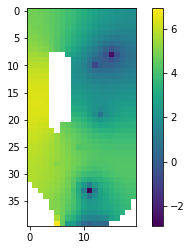

In [22]:
hdsobj = bf.HeadFile(model_ws + '/freyberg.hds')
hds = hdsobj.get_data()
hds[hds < -999] = np.nan
plt.imshow(hds[0])
plt.colorbar();

In [23]:
ml.sr.bounds

(150000.0, 20936.9221296335, 158757.72155259026, 32113.0913087035)

#### get interpolated head at some points
uses `scipy.interpolate.gridddata` to interpolate values between cell centers

In [24]:
ml.sr.interpolate(hds[0], ([157000, 160000], [30000, 27000]))

array([1.2041737, 4.218045 ], dtype=float32)

In [25]:
ml.sr.xll = 0
ml.sr.yll = 0
ml.sr.rotation = 0

## Rasterizing features

requires the `rasterio` and `fiona` modules, available via **conda-forge** (mac or windows), or the **Unofficial Python Binaries** website (windows)

#### create a geoJSON-style geometry
(this could be easily read in from a shapefile

In [26]:
try:
    import fiona
except:
    fiona = None
    print('fiona is not available')
try:
    from rasterio.features import rasterize
    from rasterio import Affine
except:
    rasterize = None
    Affine = None
    print('rasterio is not available')

#### read in a shapefile

In [27]:
if fiona is not None:
    shpname = '../data/freyberg/gis/bedrock_outcrop_hole.shp'
    with fiona.open(shpname) as src:
        records = [r for r in src]

#### list the feature geometries and attributes

In [28]:
if fiona is not None:
    geoms = [r['geometry'] for r in records]
    attr = [r['properties'] for r in records]
    attr

#### select an attribute to map onto the model grid

In [29]:
if fiona is not None:
    geoms = [(g, attr[i]['OBJECTID']) for i, g in enumerate(geoms)]

#### make an `rasterio.Affine` object using info from the sr

In [30]:
if rasterize is not None:
    dx = ml.dis.delr.array[0]
    dy = ml.dis.delc.array[0]
    trans = Affine(dx, ml.sr.rotation, ml.sr.xul, 
                   ml.sr.rotation, -dy, ml.sr.yul)
    trans

### rasterize the features, applying the attribute values to cells intersecting each one
In this case, the cells with zeros are those that don't intersect a feature

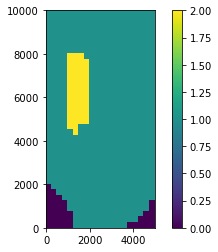

In [31]:
if rasterize is not None:
    r = rasterize(geoms, out_shape=(ml.nrow, ml.ncol), transform=trans)

    fig, ax = plt.subplots()
    qm = ml.sr.plot_array(r, ax=ax)
    ax.set_aspect(1)
    plt.colorbar(qm)